In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
%config InlineBackend.figure_format = "retina"

In [18]:
dta = pd.read_csv("../15_modified_data/train_data.csv")
# dta["nonzero_tip"] = np.where(dta.tip != 0, 1, 0)

In [19]:
month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
dta["month_int"] = dta["month"].map(month_map)
day_map = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}
dta["day_ofweek_int"] = dta["day_of_week"].map(day_map)


In [20]:
dta.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip', 'month_int',
       'day_ofweek_int'],
      dtype='object')

In [21]:
X = dta[
    [
        "trip_seconds",
        "trip_miles",
        "fare",
        "additional_charges",
        "trips_pooled",
        "max_temp",
        "min_temp",
        "precip",
        "wind_speed",
        "year",
        "hour",
        "month_int",
        "day_ofweek_int",
        "weekend"
    ]
]


In [22]:
dta

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,...,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip,month_int,day_ofweek_int
0,2019-09-24 06:30:00,2019-09-24 06:45:00,802.0,6.183132,10.0,3,2.55,False,1,2019-09-24,...,NEAR WEST SIDE,2019,September,24,Tuesday,6,0,1,9,2
1,2019-07-30 11:45:00,2019-07-30 12:30:00,2349.0,18.248731,35.0,0,8.11,False,1,2019-07-30,...,NEAR NORTH SIDE,2019,July,30,Tuesday,11,0,0,7,2
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,...,NORTH CENTER,2018,November,17,Saturday,1,1,0,11,6
3,2019-12-09 12:00:00,2019-12-09 12:15:00,698.0,3.079843,7.5,1,2.55,False,1,2019-12-09,...,NEAR WEST SIDE,2019,December,9,Monday,12,0,1,12,1
4,2018-12-17 15:00:00,2018-12-17 15:00:00,812.0,2.996371,7.5,0,2.50,False,1,2018-12-17,...,GREATER GRAND CROSSING,2018,December,17,Monday,15,0,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83698,2019-04-29 13:00:00,2019-04-29 13:15:00,1390.0,5.596053,12.5,2,2.55,False,1,2019-04-29,...,ARMOUR SQUARE,2019,April,29,Monday,13,0,1,4,1
83699,2019-01-25 20:45:00,2019-01-25 21:15:00,2214.0,10.976300,15.0,0,0.00,True,3,2019-01-25,...,GREATER GRAND CROSSING,2019,January,25,Friday,20,1,0,1,5
83700,2019-03-27 08:00:00,2019-03-27 08:30:00,1532.0,4.082240,12.5,0,2.55,False,1,2019-03-27,...,NEAR NORTH SIDE,2019,March,27,Wednesday,8,0,0,3,3
83701,2019-04-11 23:00:00,2019-04-11 23:15:00,1108.0,6.466838,12.5,0,2.55,False,1,2019-04-11,...,LAKE VIEW,2019,April,11,Thursday,23,0,0,4,4


In [23]:
X

,trip_seconds,trip_miles,fare,additional_charges,trips_pooled,max_temp,min_temp,precip,wind_speed,year,hour,month_int,day_ofweek_int,weekend
0,802.0,6.183132,10.0,2.55,1,80.06,80.06,0.000000,210.27236,2019,6,9,2,0
1,2349.0,18.248731,35.0,8.11,1,78.98,78.98,0.000000,161.05968,2019,11,7,2,0
2,684.0,5.277118,10.0,2.50,1,37.04,37.04,1.181102,161.05968,2018,1,11,6,1
3,698.0,3.079843,7.5,2.55,1,48.92,48.92,0.196850,279.61750,2019,12,12,1,0
4,812.0,2.996371,7.5,2.50,1,60.08,60.08,0.000000,161.05968,2018,15,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83698,1390.0,5.596053,12.5,2.55,1,53.06,53.06,11.417323,279.61750,2019,13,4,1,0
83699,2214.0,10.976300,15.0,0.00,3,7.16,7.16,0.000000,199.08766,2019,20,1,5,1
83700,1532.0,4.082240,12.5,2.55,1,59.00,59.00,0.787402,210.27236,2019,8,3,3,0
83701,1108.0,6.466838,12.5,2.55,1,60.98,60.98,3.385827,259.48504,2019,23,4,4,0


In [24]:
scaler = StandardScaler()
dta_scaled = scaler.fit_transform(X)

In [25]:
pca = PCA(n_components=2).fit_transform(dta_scaled)
pcaDF = pd.DataFrame(data = pca, columns=["pc1", "pc2"])
pcaDF = pd.concat([pcaDF, dta.nonzero_tip], axis = 1)
pcaDF.head()

,pc1,pc2,nonzero_tip
0,0.366498,-1.373074,1
1,5.886375,-0.665612,0
2,-0.481848,0.531735,0
3,-0.496666,0.361617,1
4,-0.431612,-0.331461,0


In [26]:
np.random.seed(1234)
pca_sampled = pcaDF.sample(2000)

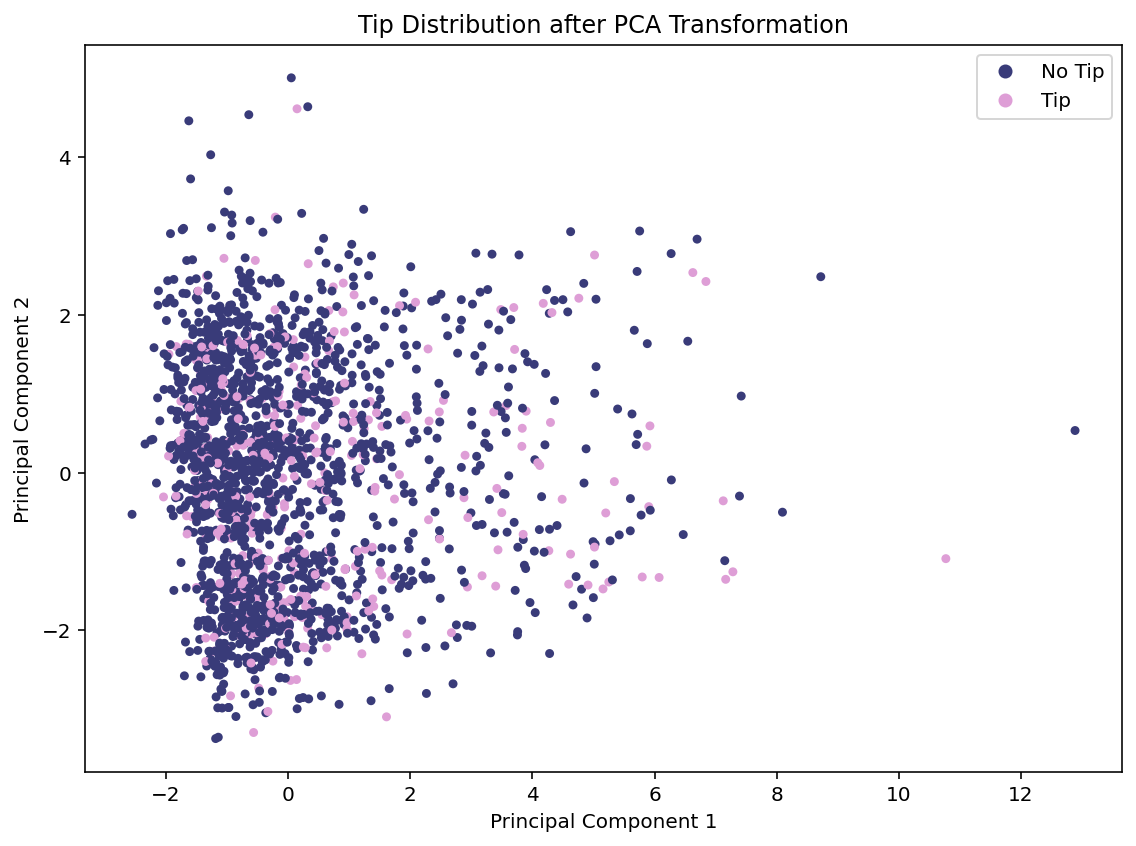

In [27]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_sampled.pc1, pca_sampled.pc2, c = pca_sampled.nonzero_tip, cmap="tab20b", s=12)
plt.legend(handles=scatter.legend_elements()[0], labels=["No Tip", "Tip"])
plt.title("Tip Distribution after PCA Transformation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()